In [3]:
# Import pandas library
import pandas as pd

# Load the dataset (fixed filename with space)
df = pd.read_csv("diabetes (2).csv")


In [4]:
# Display the first 5 rows of the dataset
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Show number of rows and columns
print("Shape of dataset (rows, columns):", df.shape)


Shape of dataset (rows, columns): (768, 9)


In [6]:
# Count missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Display data types of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [8]:
# Fill missing values in numerical columns with median
df = df.fillna(df.median(numeric_only=True))

# Verify if any missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Encode categorical columns (One-Hot Encoding)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



Categorical columns: Index([], dtype='object')


In [10]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop(columns=["Outcome"])   # assuming 'Outcome' is target
y = df["Outcome"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (614, 8)
Testing set size: (154, 8)


In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train (fit) the model on training data
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Predict diabetes onset on test set
y_pred = log_reg.predict(X_test)

# Predict probabilities (for ROC-AUC)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Evaluation Metrics:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("ROC-AUC  :", roc_auc)


Model Evaluation Metrics:
Accuracy : 0.7532467532467533
Precision: 0.6491228070175439
Recall   : 0.6727272727272727
ROC-AUC  : 0.8146923783287419


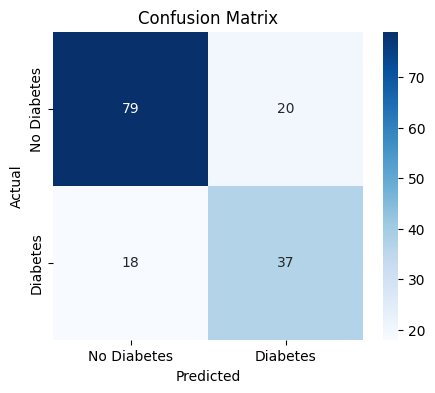

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes","Diabetes"], yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train (fit) the model on training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [17]:
# Predict diabetes onset on test set
y_pred_dt = dt_model.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Evaluation Metrics:")
print("Accuracy :", accuracy_dt)
print("Precision:", precision_dt)
print("Recall   :", recall_dt)
print("F1-Score :", f1_dt)


Decision Tree Evaluation Metrics:
Accuracy : 0.7467532467532467
Precision: 0.625
Recall   : 0.7272727272727273
F1-Score : 0.6722689075630253


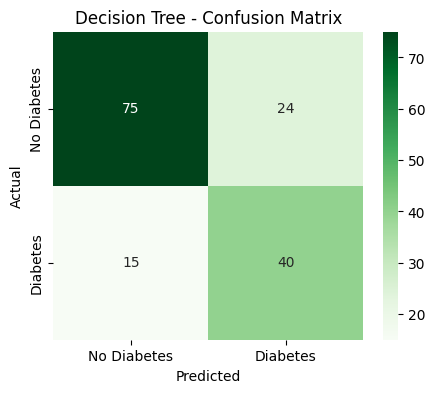

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", xticklabels=["No Diabetes","Diabetes"], yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_dt))


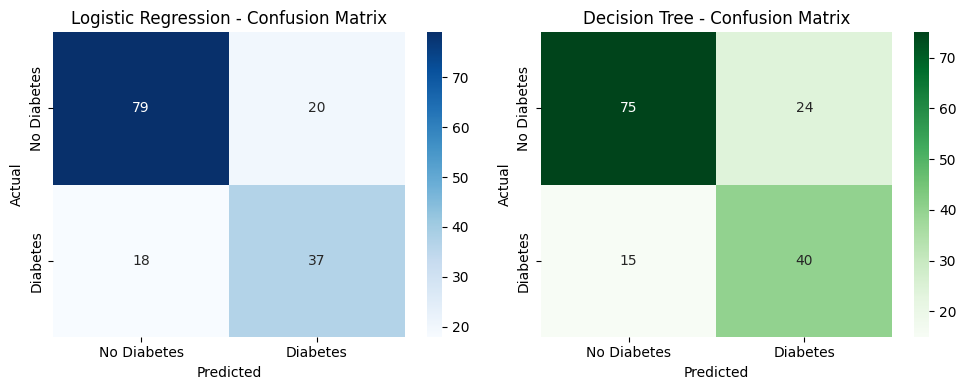

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred)

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10,4))

# Logistic Regression
plt.subplot(1,2,1)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes","Diabetes"],
            yticklabels=["No Diabetes","Diabetes"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Decision Tree
plt.subplot(1,2,2)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Diabetes","Diabetes"],
            yticklabels=["No Diabetes","Diabetes"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Collect metrics into a comparison DataFrame
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy, accuracy_dt],
    "Precision": [precision, precision_dt],
    "Recall": [recall, recall_dt],
    "F1-Score": ["-", f1_dt],   # Logistic Regression metrics already included
    "ROC-AUC": [roc_auc, "-"]   # ROC-AUC is only for Logistic Regression here
})

print("Model Performance Comparison:\n")
display(comparison_df)


Model Performance Comparison:



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.753247,0.649123,0.672727,-,0.814692
1,Decision Tree,0.746753,0.625000,0.727273,0.672269,-


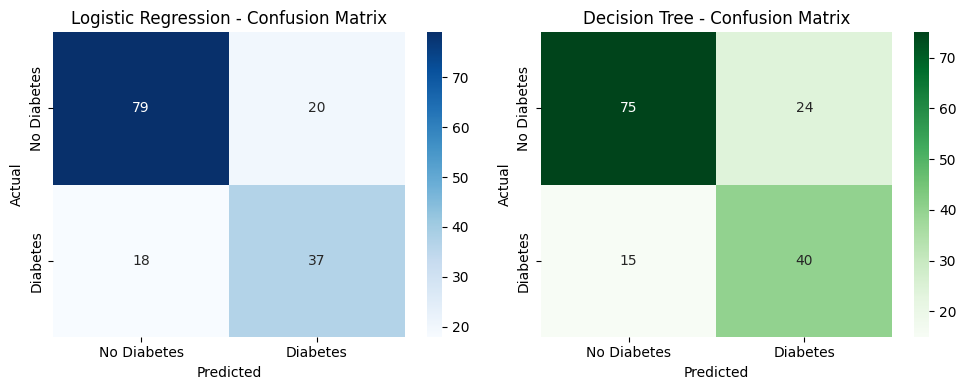

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrices
cm_log = confusion_matrix(y_test, y_pred)       # Logistic Regression
cm_dt  = confusion_matrix(y_test, y_pred_dt)    # Decision Tree

plt.figure(figsize=(10,4))

# Logistic Regression Confusion Matrix
plt.subplot(1,2,1)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes","Diabetes"],
            yticklabels=["No Diabetes","Diabetes"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Decision Tree Confusion Matrix
plt.subplot(1,2,2)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Diabetes","Diabetes"],
            yticklabels=["No Diabetes","Diabetes"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


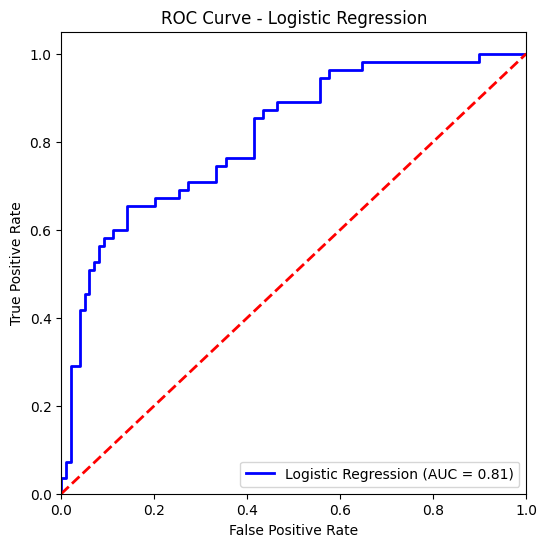

In [23]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()
